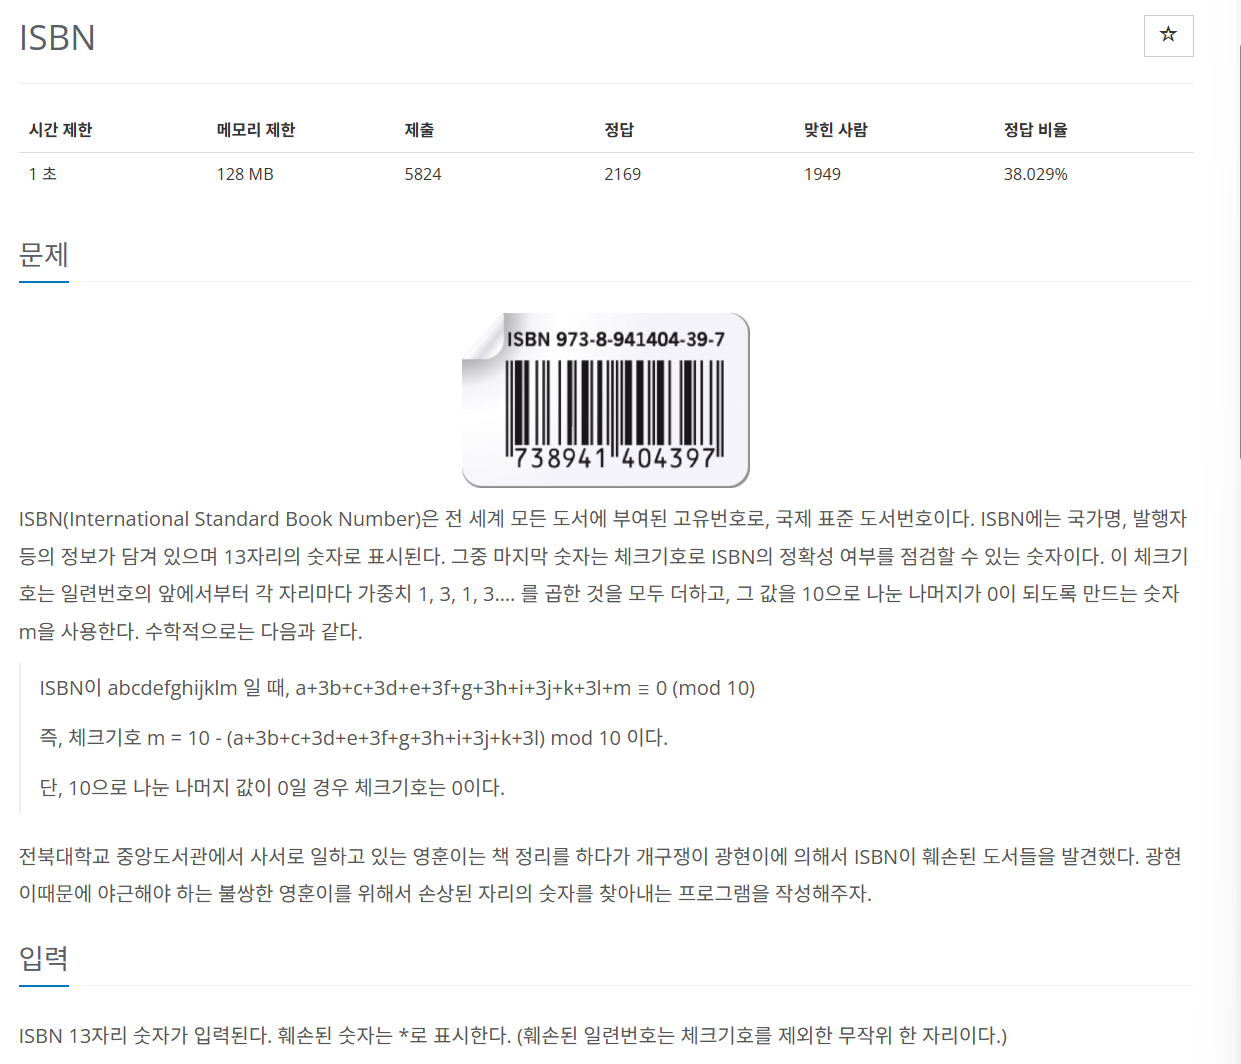

In [11]:
from PIL import Image
img= Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-07-10 003116.png")
img

In [77]:
isbn=input()

def index_return(isbn):
    for char in range(len(isbn)):
        if isbn[char].isdigit()== 0 :
               return char+1



def calculator(isbn):
    sumv=0
    for char in range(len(isbn)):
        if isbn[char].isdigit()== 0 :
            pass
        elif char%2==1:
             sumv += int(isbn[char])*3
        else:
             sumv += int(isbn[char])
        # print(f'자리{char+1}sumv{sumv}')
    return sumv

sumv=calculator(isbn)
index=index_return(isbn)
mul=sumv//10



if index%2==0 and sumv%10 != 0:
    for i in range(1,4):
        if ((mul+i)*10 - sumv)%3 ==0:
            val = ((mul+i)*10 - sumv)//3

elif sumv%10==0:
    val=0
else:
    val = (mul+1)*10 - sumv 

print(val)



0


# Gemini 풀이

In [78]:
# ISBN 번호를 입력받습니다.
isbn = input()

# '*'를 제외한 모든 숫자의 가중치 합을 계산하고, '*'의 위치와 가중치를 찾습니다.
total_sum = 0
star_weight = 0

for i, char in enumerate(isbn):
    # 현재 위치(i)에 따른 가중치를 결정합니다. (홀수번째 자리: 1, 짝수번째 자리: 3)
    weight = 1 if i % 2 == 0 else 3

    if char == '*':
        # '*'의 가중치를 저장합니다.
        star_weight = weight
    else:
        # 숫자인 경우 가중치를 곱해 총합에 더합니다.
        total_sum += int(char) * weight

# 0부터 9까지의 숫자를 테스트하여 검증식을 만족하는 답을 찾습니다.
for x in range(10):
    # (기존 총합 + 테스트 숫자 * 가중치)가 10으로 나누어 떨어지는지 확인합니다.
    if (total_sum + x * star_weight) % 10 == 0:
        print(x)  # 답을 찾으면 출력하고 즉시 종료합니다.
        break

0



---

### ## 총평 및 5점 척도 평가

* **내 풀이 (User's solution): 3.5 / 5.0 점**
    * **평가:** 여러 번의 디버깅 끝에 문제의 모든 논리적 함정을 피해 **정답을 맞힐 수 있는 올바른 코드**를 완성했습니다. 하지만 문제 해결 방식이 다소 복잡하고, 파이썬의 특징을 충분히 활용하지 못한 아쉬움이 있습니다.

* **Gemini의 풀이: 4.5 / 5.0 점**
    * **평가:** 문제의 본질을 파고들어 가장 **직관적이고 간결한 방식**으로 해결했습니다. 파이썬의 내장 기능을 적절히 활용하여 코드의 가독성과 효율성을 높였습니다.

---
### ## 1. 알고리즘 측면

#### **내 풀이: 수학적 역산(逆算) 방식**
사용자님의 접근법은 문제의 최종 목표(총합이 10의 배수)를 달성하기 위해, `*`에 들어갈 값을 **수식을 통해 역으로 계산**해내는 방식입니다.

* **개선할 점:** 이 방식은 가중치가 1일 때는 잘 동작하지만, 가중치가 3일 때는 `(목표값 - 현재 합) % 3 == 0`을 만족하는 목표값을 찾아야 하는 등 **경우의 수가 복잡해집니다.** 이 복잡성 때문에 이전 버전들에서 `val = 10`과 같은 논리적 오류가 발생했던 것입니다. 즉, **알고리즘 자체가 복잡하여 버그가 발생할 가능성이 높습니다.**

#### **Gemini의 풀이: 전수조사(Brute-force) 방식**
Gemini의 접근법은 `*`에 들어갈 수 있는 숫자가 0~9까지 10개뿐이라는 점에 착안하여, **가능한 모든 숫자를 직접 넣어보고 조건에 맞는지 확인**하는 방식입니다.

* **배울 점:** 이 문제처럼 **테스트해야 할 데이터의 범위가 매우 작고 명확할 때는, 복잡한 수식을 세우는 것보다 전수조사가 훨씬 더 간단하고 강력한 알고리즘**이 될 수 있습니다. 코드가 직관적으로 변하고, 고려해야 할 예외 케이스가 줄어들어 훨씬 안정적인 코드를 작성할 수 있습니다.

---
### ## 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 개선할 점**

1.  **C 스타일의 `for` 루프:** `for char in range(len(isbn)):`과 같이 인덱스를 직접 생성하여 `isbn[char]`로 접근하는 방식은 다른 언어에서 흔히 사용되지만, 파이썬에서는 잘 사용하지 않습니다.

2.  **불필요한 함수 분리 및 반복:** `index_return`와 `calculator` 함수는 각각 `isbn` 문자열을 한 번씩 처음부터 끝까지 순회합니다. 즉, **총 2번의 반복**이 일어납니다. 이 문제의 규모에서는 성능 차이가 없지만, 데이터가 커지면 비효율적일 수 있습니다.

3.  **가독성이 낮은 조건문:** `isbn[char].isdigit() == 0`은 동작은 하지만, `not isbn[char].isdigit()`에 비해 의도를 파악하기 어렵습니다.

#### **Gemini 풀이에서 배울 점 (Pythonic)**

1.  **`enumerate()` 활용:** `for i, char in enumerate(isbn):` 구문을 사용하면 **루프를 돌면서 인덱스(`i`)와 값(`char`)을 동시에** 얻을 수 있습니다. 이는 `range(len())`을 사용하는 것보다 훨씬 파이썬다운(Pythonic) 방식입니다.

2.  **단일 패스(Single Pass) 처리:** 단 한 번의 `for` 루프 안에서 `*`를 제외한 합계 계산과 `*`의 가중치 확인을 **동시에 처리**하여 코드의 효율성과 간결함을 높였습니다.

3.  **삼항 연산자 (Ternary Operator):** `weight = 1 if i % 2 == 0 else 3`처럼 간단한 `if-else` 구문을 한 줄로 표현하여 코드를 더 짧고 간결하게 만들었습니다.